# Math387 Lab Assignment 2
## An experimental study of the growth factor for Gaussian elimination with partial pivoting. 
### Modified by Shenshun Yao; Student ID:260709204


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random as rn

## (1). Generating a random Matrix
Write a function that takes $n$ as its parameter and generates an $n*n$ matrix, whose entries are random numbers uniformly distributed in $[-1,1]$.

In order to simplify the calculation, we assume $n \in N^+$ and $n \in [1,100]$.

In [2]:
def randomMatrix(n):
    A=np.random.uniform(-1,1,(n,n))
    return A

## (2). Implement Gaussian elimination with partial pivoting

In [3]:
E = randomMatrix(8)

In [4]:
def GEPP(A, matrixGood = True):
    n = len(A)
    for k in range(n-1):
        if matrixGood:
            # Pivot
            maxindex = abs(A[k:,k]).argmax() + k
            if A[maxindex, k] == 0:
                raise ValueError("Matrix is singular.")
            # Swap
            if maxindex != k:
                A[[k,maxindex]] = A[[maxindex, k]]
        else:
            if A[k, k] == 0:
                raise ValueError("Pivot element is zero. Try setting matrixGood to True.")
        #Eliminate
        for row in range(k+1, n):
            multiplier = A[row,k]/A[k,k]
            A[row, k:] = A[row, k:] - multiplier*A[k, k:]
    return A


In [5]:
GEPP(E)

array([[  8.48293798e-01,   2.62242689e-01,  -7.58416940e-01,
          5.52555874e-01,   5.09539485e-01,   4.06228575e-01,
         -4.62525299e-01,   6.66994623e-01],
       [  0.00000000e+00,   8.07847149e-01,  -3.72411237e-01,
         -4.10207258e-01,  -9.78456158e-01,   7.80028720e-01,
         -7.06857590e-01,   6.10483978e-01],
       [  0.00000000e+00,   0.00000000e+00,   1.11654869e+00,
          4.85905905e-01,   1.50911663e+00,  -6.85287001e-01,
          3.84782532e-01,   3.50118354e-01],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         -1.55859926e+00,  -8.89651695e-01,  -9.90651450e-01,
         -1.55509310e-01,  -9.54485594e-01],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   1.70894555e+00,  -2.34435661e+00,
          9.87654843e-01,  -3.99274072e-01],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   1.27178024e+00,
         -1.45605178e+00,   1.9

## (3).Plot the growth factor
First we define a function ``growthFactor" w.r.t. the matrix size.

In [6]:
def gf(n):
    E = randomMatrix(n)
    a = abs(E.max())
    U = GEPP(E)
    b = abs(U.max())
    return abs(b/a)

In [7]:
gf(8)

1.5537301978929321

## The we plot the graph:

In [8]:
GF  = []
for n in range(10,1000,5):
    GF.append(gf(n))

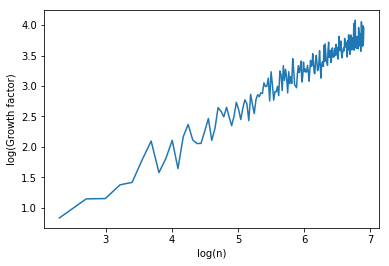

In [9]:
xlist = [range(10,1000,5)]
plt.plot((np.log(xlist)).flatten(),np.log(GF))
plt.xlabel('log(n)')
plt.ylabel('log(Growth factor)')
plt.show()

From the experimental plot, we estimate the power $\alpha \approx 0.5$. Compare this with the worst case scenario, our estimation is much better.

## (4). Study the probability distribution of the growth factor

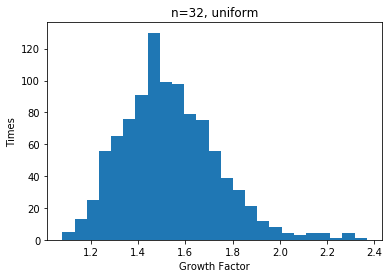

In [10]:
GF32 = []
count = 0 
while (count < 1000):
    count = count + 1
    GF32.append(gf(32))
    
plt.hist(np.log(GF32),bins='auto')
plt.title('n=32, uniform')
plt.xlabel('Growth Factor')
plt.ylabel('Times')
plt.show()

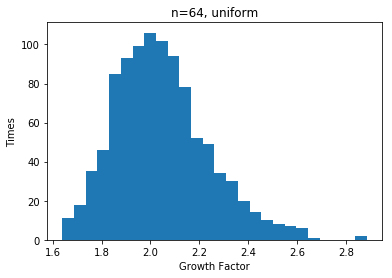

In [11]:
GF64 = []
count = 0 
while (count < 1000):
    count = count + 1
    GF64.append(gf(64))
    
plt.hist(np.log(GF64),bins='auto')
plt.title('n=64, uniform')
plt.xlabel('Growth Factor')
plt.ylabel('Times')
plt.show()

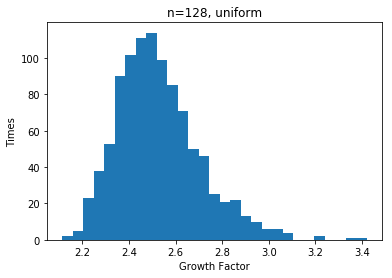

In [12]:
GF128 = []
count = 0 
while (count < 1000):
    count = count + 1
    GF128.append(gf(128))
    
plt.hist(np.log(GF128),bins='auto')
plt.title('n=128, uniform')
plt.xlabel('Growth Factor')
plt.ylabel('Times')
plt.show()

From the plot above, we can assume that the PDF of the growth factor is approximately a normal distribution. Also, the conjecture we made on how the probability density decays as the growth factor becomes large is exponential decay.

## (5). Repeat the preceding 2 items for matrices whose entries are random numbers with a normal distribution.

### We pick the mean $\mu = -2$ and the variance $\sigma^2 = 5$.

In [13]:
def randomMatrix(n):
    A=np.random.normal(-2,5,(n,n))
    return A

In [14]:
GF  = []
for n in range(10,1000,5):
    GF.append(gf(n))

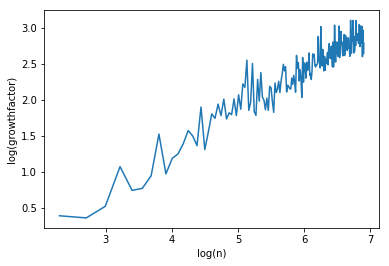

In [15]:
xlist = [range(10,1000,5)]
plt.plot((np.log(xlist)).flatten(),np.log(GF))
plt.xlabel('log(n)')
plt.ylabel('log(growthfactor)')
plt.show()

From the experimental plot, we estimate the power $\alpha \approx 0.56$. Compare this with the worst case scenario, our estimation is much better.

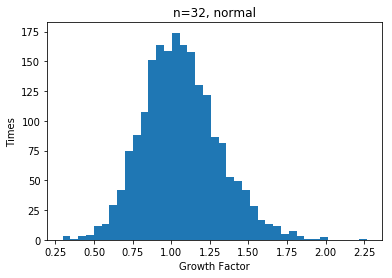

In [16]:
GF32 = []
count = 0 
while (count < 2000):
    count = count + 1
    GF32.append(gf(32))
    
plt.hist(np.log(GF32),bins='auto')
plt.title('n=32, normal')
plt.xlabel('Growth Factor')
plt.ylabel('Times')
plt.show()

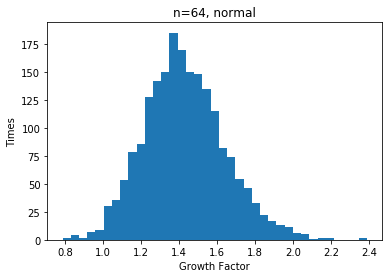

In [17]:
GF64 = []
count = 0 
while (count < 2000):
    count = count + 1
    GF64.append(gf(64))
    
plt.hist(np.log(GF64),bins='auto')
plt.title('n=64, normal')
plt.xlabel('Growth Factor')
plt.ylabel('Times')
plt.show()

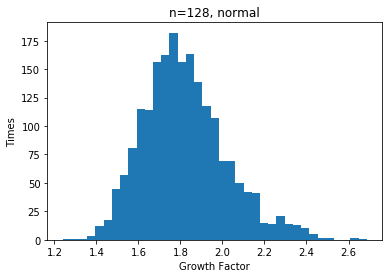

In [18]:
GF128 = []
count = 0 
while (count < 2000):
    count = count + 1
    GF128.append(gf(128))
    
plt.hist(np.log(GF128),bins='auto')
plt.title('n=128, normal')
plt.xlabel('Growth Factor')
plt.ylabel('Times')
plt.show()

From the plot above, we can assume that the PDF of the growth factor is still approximately a normal distribution. Also, the conjecture we made on how the probability density decays as the growth factor becomes large is exponential decay.